## 🔍 Dimension Reduction & Classification (Glass Dataset)

### 🧩 Problem Statement
In this project, we apply **PCA** on the Glass Classification dataset to reduce feature noise and then use a **Decision Tree Classifier** to predict the type of glass.

---

### 📊 Workflow
1. **Data Preprocessing**: Loading `Glass.csv` and performing feature scaling using `StandardScaler`.
2. **Dimensionality Reduction**: Applying PCA to transform the original 9 features into principal components.
3. **Model Training**: Training a Decision Tree on the reduced feature set.
4. **Prediction**: Testing the model's ability to classify glass types based on transformed coordinates.

---

### 🛠️ Tech Stack
- **Standardization**: `StandardScaler` (Mandatory for PCA).
- **Decomposition**: `PCA` from Scikit-Learn.
- **Classifier**: `DecisionTreeClassifier`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Glass.csv")

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
data=df.drop(labels=["Type"],axis=1)

In [15]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [17]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [19]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [27]:
scale_data=scaler.fit_transform(data)

In [29]:
scale_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [31]:
df=pd.DataFrame(scale_data,columns=data.columns)

In [33]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [35]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [37]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA()

In [41]:
pca.fit_transform(df)

array([[ 1.15113957,  0.52948764, -0.37209565, ...,  0.39560005,
         0.19716008, -0.01634649],
       [-0.57413717,  0.75978777, -0.55670817, ...,  0.02415793,
         0.28421356,  0.0107898 ],
       [-0.94015972,  0.92983597, -0.55490744, ...,  0.36751757,
         0.09594067, -0.02164019],
       ...,
       [-1.68024627, -3.28482346, -0.93034851, ..., -0.67412231,
         0.89170969, -0.04628358],
       [-2.36974768, -2.7568728 , -1.23470076, ..., -0.67889932,
        -0.07446015,  0.02730068],
       [-2.26264885, -3.02859155, -0.89084474, ..., -0.46246107,
        -0.0633149 ,  0.01944978]])

#### convert the above data to Data frame

In [45]:
pd.DataFrame(pca.fit_transform(df))

,0,1,2,3,4,5,6,7,8
0,1.151140,0.529488,-0.372096,-1.728901,-0.251936,0.340210,0.395600,0.197160,-0.016346
1,-0.574137,0.759788,-0.556708,-0.760232,-0.257071,-0.115960,0.024158,0.284214,0.010790
2,-0.940160,0.929836,-0.554907,-0.206254,-0.237506,0.126630,0.367518,0.095941,-0.021640
3,-0.142083,0.961677,-0.117125,-0.415724,-0.476299,0.285805,0.052497,0.002959,-0.092035
4,-0.351092,1.091249,-0.485079,-0.069102,-0.432090,0.298032,-0.158570,0.191316,-0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,-3.061677,0.090445,0.376611,0.103227,0.231162,1.320186,-0.189401,0.028657
210,-2.397652,-3.108236,-1.117502,-0.288454,0.624723,0.618056,-0.582361,-0.131651,0.013663
211,-1.680246,-3.284823,-0.930349,0.171014,0.451687,1.247320,-0.674122,0.891710,-0.046284
212,-2.369748,-2.756873,-1.234701,0.525285,0.515008,1.003352,-0.678899,-0.074460,0.027301


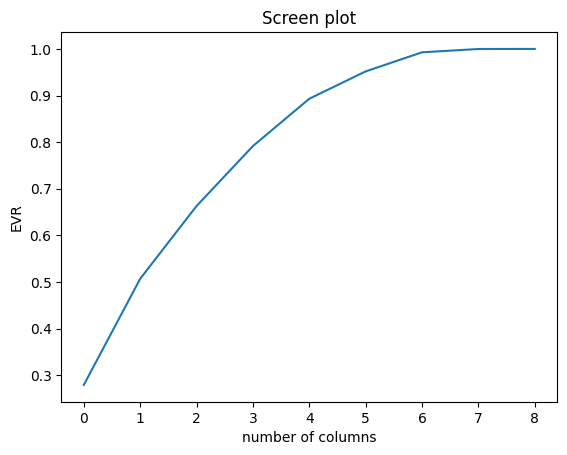

In [63]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of columns")
plt.title("Screen plot")
plt.ylabel("EVR")
plt.show()

In [53]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [65]:
pca1=PCA(n_components=5)

In [67]:
new_data=pca1.fit_transform(df)

In [69]:
new_data

array([[ 1.15113957,  0.52948764, -0.37209565, -1.72890103, -0.25193583],
       [-0.57413717,  0.75978777, -0.55670817, -0.76023228, -0.25707069],
       [-0.94015972,  0.92983597, -0.55490744, -0.20625431, -0.23750587],
       ...,
       [-1.68024627, -3.28482346, -0.93034851,  0.17101386,  0.45168739],
       [-2.36974768, -2.7568728 , -1.23470076,  0.52528451,  0.51500795],
       [-2.26264885, -3.02859155, -0.89084474,  0.41449108,  0.50547398]])

In [71]:
pd.DataFrame(new_data,columns=["PC1","PC2","PC3","PC4","PC5"])

,PC1,PC2,PC3,PC4,PC5
0,1.151140,0.529488,-0.372096,-1.728901,-0.251936
1,-0.574137,0.759788,-0.556708,-0.760232,-0.257071
2,-0.940160,0.929836,-0.554907,-0.206254,-0.237506
3,-0.142083,0.961677,-0.117125,-0.415724,-0.476299
4,-0.351092,1.091249,-0.485079,-0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,-3.061677,0.090445,0.376611,0.103227
210,-2.397652,-3.108236,-1.117502,-0.288454,0.624723
211,-1.680246,-3.284823,-0.930349,0.171014,0.451687
212,-2.369748,-2.756873,-1.234701,0.525285,0.515008


In [73]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


### in my origional data set there are 9 column but in new data set the pc values there are only 5 column are present because used to the pca

In [79]:
data1=pd.read_csv("Glass.csv")

In [81]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [83]:
y=data1.Type

In [85]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [87]:
x=pd.DataFrame(new_data,columns=["PC1","PC2","PC3","PC4","PC5"])

In [89]:
x

,PC1,PC2,PC3,PC4,PC5
0,1.151140,0.529488,-0.372096,-1.728901,-0.251936
1,-0.574137,0.759788,-0.556708,-0.760232,-0.257071
2,-0.940160,0.929836,-0.554907,-0.206254,-0.237506
3,-0.142083,0.961677,-0.117125,-0.415724,-0.476299
4,-0.351092,1.091249,-0.485079,-0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,-3.061677,0.090445,0.376611,0.103227
210,-2.397652,-3.108236,-1.117502,-0.288454,0.624723
211,-1.680246,-3.284823,-0.930349,0.171014,0.451687
212,-2.369748,-2.756873,-1.234701,0.525285,0.515008


In [91]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
from sklearn import tree

In [95]:
dt_model=DecisionTreeClassifier()

In [97]:
dt_model.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [99]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [107]:
dt_model.predict(pca1.transform(scaler.transform([[1.52101,	13.64,	4.49,	1.10,	71.78,	0.06,	8.75,	0.00,	0.0]])))

C:\Users\subod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\subod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\subod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)